# Robna zatemnitev Sonca

## Strukture na Soncu

Zvezde in s tem naše Sonce niso idealne sfere, niti črna telesa. Če opazujemo površje Sonca že z majhnim teleskopom lahko razločimo različne strukture in pojave v Sončevi atmosferi. Najbolj očitne so Sončeve pege, hladnejša in s tem temnejša področja, ki jih ustvarijo kaotične magnetne silnice. Razločimo lahko tudi izbruhe snovi s Sončevega površja, fakule (svetlejša področja blizu peg), granulacijo (konvekcijsko mešanje ) in robno zatemnitev. Robna zatemnitev, ki je fokus te vaje, je navidezno temnejše površje Sonca blizu njegovega roba napram središču Sončeve ploskvice.

Ob jedrskih reakcijah v središču Sonca nastajajo fotoni, ki se sipljejo skozi notranje plasti Sonca, dokler ne pridejo do njegovega površja. Tam se lahko prosto izsevajo v vesolje. Površje je slaba beseda za opis zunanjih plasti Sonca, saj to ni dobro definirana površina ali meja. Gre za del Sončeve strukture, ki ji pravimo atmosfera.

Fotosfera je najglobji del Sončeve atmosfere od koder izvira večina fotonov, ki lahko neovirano pripotuje do opazovalca, od tu pride tudi ime. Fotosfera je debela dobrih 100 km. Globji deli fotosfere so bolj vroči, višji deli pa hladnejši, v povprečju pa je temperatura vidnega dela fotosfere okoli 5770 K. Če gledamo pravokotno skozi fotosfero (na sredini Sončeve ploskvice), vidimo globje v fotosfero, torej opazujemo bolj vroče in svetlejše dele. Če gledamo skozi fotosfero pod kotom (na robu Sončeve ploskvice) pa ne vidimo tako globoko in opazujemo višje in temnejše dele fotosfere. Efekt robne zatemnitve torej nastane izključno v fotosferi.

Nad fotosfero se nahaja med 3000 in 5000 km debela kromosfera. Kromosfera je veliko redkejša od fotosfere in je zato skoraj povsem prozorna. Na globjem delu ima enako temperaturo kot fotosfera, potem pa se ohladi do temperatur okoli 3000 K. Pri teh temparaturah vodik v kromosferi seva emisijke črte, kar lahko opazujemo s H$\alpha$ teleskopom in vidimo tudi kot rdečo atmosfero med popolnim Sončevim mrkom. Od tu ime kromosfera. 

Nad kromosfero se nahaja še redkejša korona. Magnetna polja jo segrejejo na par milijonov K. Vidimo jo kot bel sij okoli Sonca med popolnimi Sončevimi mrki. Iz korone izhaja Sončev veter, ki seže do robov Osončja.

## Opis vaje

Cilj te vaje je izračunati kako se temperatura Sončeve atmosfere spreminja z globino v atmosferi. Uporabimo zelo preprosta opazovanja Sončeve površine, ki jih boste izvedli z malim teleskopom in Sončevim filtrom. Naučili se boste slikanja s teleskopom in prikaza ter osnovne analize astronomskh posnetkov v programskem jeziku python. Izmerili boste, kakšna je svetlost površine Sonca, ki jo boste poskušali pojasniti z različnimi fizikalnimi modeli Sončeve atmosfere. Pri tem se boste spoznali s konceptom optične globine. Smiseln model boste našli s pomočjo regresije. Iz modela boste znali izračunati temperaturni profil v zgornjih plasteh Sonca. 

## Opazovanje Sonca

Ker bi pogled v Sonce skozi teleskop nemudoma povzročil slepoto ali uničil kamero, bomo pri tej vaji posebej pazljivi. Za opazovanje Sonca vedno uporabljamo namenske filtre, ki so pritrjeni pred teleskop. Filter pregledamo za morebitne poškodbe in ga na teleskop dobro pritrdimo. Filter ostane nameščen celotno opazovanje. S teleskopm medtem ne opazujemo drugih objektov, ki bi terjali snemanje in ponovno nameščanje filtra.

### Inštrumenti

Za opazovanje Sonca boste uporabili 25 cm teleskop Skywatcher na montži EQ6, Sončev filter in kamero SBIG ST-8300. Uporabili boste lahko tudi barvne filtre.

### Postopek slikanja površine Sonca

Postopek slikanja je preprost. Ker imamo na voljo obilico svetlobe, delamo kratke ekspozicije. Preverimo, da slika ni preosvetljena. Pazimo, da je slika Sonca v sredini polja, da ne bi površinske svetlosti prizadelo vinjetiranje in da smo na sliko zajeli celotno ploskvico Sonca. Posebne obdelave slik ne potrebujemo. Od kalibracijskih posnetkov lahko naredimo bias posnetke. Če jih ne, bomo pri analizi posnetka morali upoštevati, da ozadje ni povsem brez signala. Tega v tem primeru ne naredimo, ker so slike za to vajo posnete iz vesolja. 

### Pregled opazovanj

Tukaj imamo na voljo posnetek Sonca narejen s kamero Polarimetric and Helioseismic Imager (PHI) na satelitu Solar Orbiter. Narejen je v rdeči svetlobi. 

Poglejmo najprej kako odpremo in prikažemo posnetek. V teh zapiskih najprej naložimo python module, ki jih bomo potrebovali.

In [12]:
%matplotlib inline
from astropy.io import fits # modul za delo s fits posnetki
import matplotlib.pyplot as plt # modul za risanje grafov
import numpy as np # modul za numerične operacije
from scipy import ndimage # modul z drugimi uporabnimi funkcijami, ki jih uporabljamo za analizo slik

Astronomske posnetke dobimo v formatu FITS. Več o tem formatu bom napisal v vaji Barvna slika. Pokažimo kako odpremo posnetek in ga narišemo.

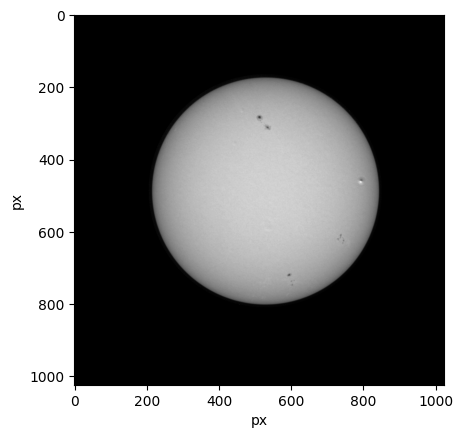

In [13]:
# definiramo ime slike
image_file = "podatki/Sonce/PHI.fits"

# preberemo podatke o tej sliki iz fits datoteke
image_data = fits.getdata(image_file)

# prikazemo podatke kot sliko
plt.imshow(image_data, cmap = 'gray');
plt.xlabel('px');
plt.ylabel('px');

Sliko smo torej prikazali kot matriko velikosti $1024 \times 1024$, kjer vsak element matrike pove kako svetla je slika v tistem pikslu. 

## Analiza posnetka

Naslednja naloga je najti center slike Sonca in izračunati kako se svetlost spreminja v koncentričnih krogih kot funkcija oddaljenosti od središča slike. Najdimo najprej center.

In [14]:
# threshold nam definira locnico med signalom (tam kjer je Sonce na sliki) in delom slike brez signala. 
# Slika je umerjena tako, da ima sredisce ploskvice svetlost okoli 1. Spodnji racun deluje za poljubno umerjeno sliko.
threshold = 0.2 * np.percentile(image_data,95)

# naredimo masko, to je slika, ki ima vrednost slike tam kjer je signal nad thresholdom in 0 tam kjer ni
mask = image_data > threshold 

# center diska nam definira tezisce take slike
cy, cx = ndimage.center_of_mass(mask)
print('center:', cx, cy)

center: 529.6451315806422 486.51928947741294


Da se prepričamo, da je center izračunan prav, ga narišimo na sliko, skupaj z nekaj koncentričnimi krogi.

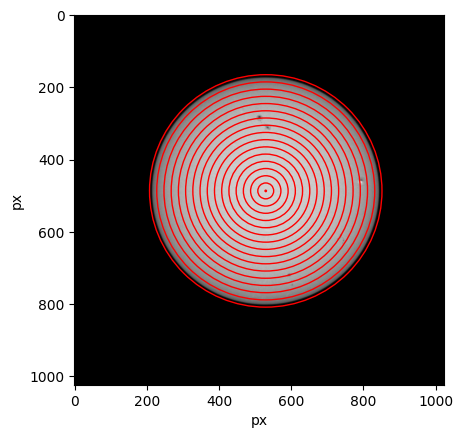

In [15]:
plt.imshow(image_data, cmap = 'gray');

for radius in np.arange(2, 342, 20):
    circle = plt.Circle((cx, cy), radius, color = 'r', fill = False)
    plt.gca().add_patch(circle)

plt.xlabel('px');
plt.ylabel('px');

Izmerimo kakšna je povprečna svetlost Sončeve ploskvice v vsakem kolobarju. Rezultate bomo prikazali na graf svetlosti kot funkcijo radija kolobarja.

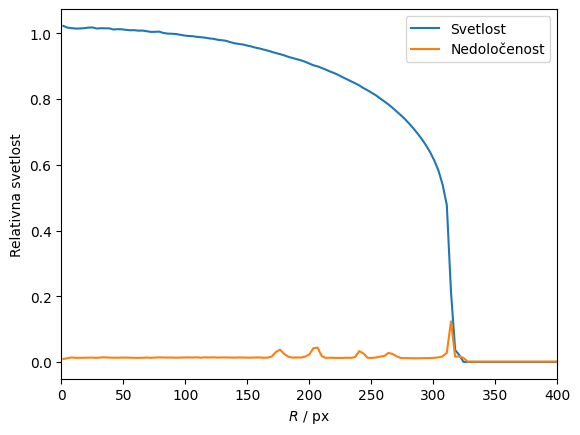

In [16]:
# Naredimo se eno matriko (sliko), kjer je vrednost vsakega elementa oddaljenost od sredisca (cx,cy)
y, x = np.indices(image_data.shape)
r = np.sqrt((x - cx)**2 + (y - cy)**2)

# s to matriko lahko enostavno izberemo piksle, ki jih bomo steli k svetlosti in tiste, ki jih ne bomo, ko naredimo zanko po kolobarjih
n_bins = 120 # stevilo korakov po radiju
r_max = 400.0 # najvecji radij
dr = r_max / n_bins # debelina kolobarja

# prostor za shranjevanje rezultatov
radij = []
svetlost = []
nedolocenost = []

for r_ in np.linspace(0,r_max, n_bins):
    # piksli, ki so v kolobarjju:
    labels = np.zeros(image_data.shape, dtype=int)
    labels[(r>r_)&(r<r_+dr)]=1
    # izracun mediane svetlosti kolobarja
    brightness = ndimage.median(image_data, labels = labels)
    brightness_std = ndimage.standard_deviation(image_data, labels = labels) +0.001
    # rezultat skupaj s povprecnim radijem zapisemo v tabelo rezultatov
    radij.append(r_+dr/2.)
    svetlost.append(brightness)
    nedolocenost.append(brightness_std)

# tabelo rezultatov narisemo

plt.plot(radij, svetlost, label = 'Svetlost')
plt.plot(radij, nedolocenost, label = 'Nedoločenost')

# opremimo graf

plt.legend()
plt.xlabel('$R\\ /\\ \\mathrm{px}$')
plt.ylabel('Relativna svetlost')
plt.xlim(0,400);

## Modeliranje meritev

Našo meritev želimo opisati s fizikalnim modelom Sončeve atmosfere. Poglejmo si štiri modele in raziščimo kako dobro opišejo meritve.

### 1. model: Lambertovo svetilo

Najenostavnejši model Sončeve površine je brez atmosfere in ima diskretno mejo med notranjostjo Sonca in praznino vesolja. Površina takega objekta bi svetlobo enakomerno sevala v vse smeri. Takemu svetilu pravimo Lambertovo svetilo. Posledica je, da bi celotna površina Sonca imela enako svetlost, torej nič robne zatemnitve. Tega tukaj ne bomo izpeljali, je pa preprosto narediti analogijo. Lambertovih svetil v naravi ni veliko, so pa taki ponavadi sipalci svetlobe. Enostavno si lahko predstavljamo, da bela stena izgleda enako svetla pod katerimkoli kotom jo pogledamo. 

Model Lambertovega svetila očitno ne opiše atmosfere Sonca, saj že na prvi pogled vidimo, da je robna zatemnitev znatna. 

### 2. model: Tanka atmosfera, ki absorbira svetlobo, a je nič ne seva.

Naj bo nad površino Sonca, kot je opisana v prejšnjem modelu, še tanka plast atmosfere, ki lahko svetlobo s površja absorbira. Debelino atmosfere lahko opišemo s t.i. optično globino. To je brezdimenzijska količina, ki opiše kakšen delež svetlobe se absorbira v celotni debelini atmsfere:
$$\frac{I(\tau)}{I_0}=\exp(-\tau),$$
kjer je $\tau$ optična globina, $I_0$ intrinzična svetilnost, $I(\tau)$ pa svetilnost po absorpciji v mediju z optično globino $\tau$. V mediju z optično globino $\tau=1$, se absorbira $1-\exp(-1)=63.2\%$ svetlobe.

V centru Sončeve ploskvice gledamo skozi plast atmosfere z debeino $\tau$. Na drugih delih ploskvice pa svetloba, ki pride s površja Sonca do nas prepotuje debelejši del atmosfere $\tau/\cos(\theta)$, kot je ilustrirano na sliki spodaj. Pri tem smo predpostavili, da je atmosfera veliko tanjša od $R$ in da si lahko privoščimo nekaj napake ob robu ploskve. 

<figure>
<img src="sonce_model2.png" width="380"/>
</figure>

Iz dela Sončeve površine pri kotu $\theta$ do opazovalca pride $I(\theta)=I_0 \exp(-\tau/\cos \theta)$ svetlobe. Tej količini bomo rekli svetilnost. $\cos\theta$ (za $\theta$ med $0^\circ$ in $90^\circ$) lahko izrazimo tudi kot $\sqrt{1-(r/R)^2}$. Zapišemo lahko torej zvezo med svetilnostjo Sončeve površine na sredini ploskvice in pri radiju $r$:
$$\frac{I(\theta)}{I(0)}=\frac{I_0 \exp\left( \frac{-\tau}{\cos \theta}\right) }{I_0 \exp(-\tau)}$$
$$=\exp\left( -\tau \left( \frac{1}{\cos \theta} -1 \right) \right).$$
Izrazimo z radijem in dobimo:
$$I(r)=\exp\left( -\tau \left( \frac{1}{\sqrt{1-(r/R)^2}} -1 \right) \right).$$


Narišimo nekaj modelov za različne vrednosti $\tau$ preko naše meritve robne zatemnitve. Normirajmo meritve in model, tako da je relativna svetilnost pri $r=0$ enaka 1. S slike lahko tudi ocenimo, da je radij Sonca $R=315$ pikslov.

/tmp/ipykernel_1960350/2278898028.py:14: RuntimeWarning: invalid value encountered in sqrt
  I2 = np.exp(-tau*(1/(np.sqrt(1-(r/R)**2) ))-1)


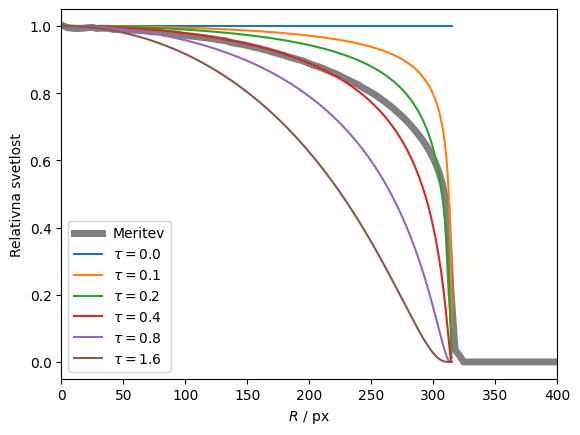

In [17]:
# svetlost bom normiral na 1
svetlost = svetlost / svetlost[0]

# Narisimo meritve
plt.plot(radij, svetlost, '-', c = 'gray', lw = 5, label = 'Meritev')
plt.xlabel('$R\\ /\\ \\mathrm{px}$')
plt.ylabel('Relativna svetlost')
plt.xlim(0,400);

# Model s tanko absorpcijsko atmosfero
r = np.linspace(0,400,1000)
R = 315.0
for tau in [0.0, 0.1, 0.2, 0.4, 0.8, 1.6]:
    I2 = np.exp(-tau*(1/(np.sqrt(1-(r/R)**2) ))-1)
    plt.plot(r,I2/I2[0], label = '$\\tau=%s$' % tau)

plt.legend();

Model za $\tau=0$ je identičen prvemu modelu s površino Sonca kot Lambertovim svetilom ($\tau=0$ pomeni nič, oziroma neskončno tanka atmosfera). Model z $\tau=0.3$ se najbolje ujema z opazovanji, vendar ne dobro. Natančnost naših opazovanj je veliko večja od razlik med opazovanji in modelom. Iščemo torej boljši fizikalni model.

### 3. model: Tanka atmosfera, ki absorbira svetlobo s površja in seva še svoj delež svetlobe

Predpostavimo sedaj, da površje seva s svetilnostjo $I_\mathrm{p}$ (temu smo v prejšnjem modelu rekli $I_0$) in atmosfera seva s svetilnostjo $I_\mathrm{a}$. Svetloba s površja se še vedno absorbira v atmosferi, ki ima optično globino $\tau$. Svetilnost, ki jo izmeri opazovalec, je torej kombinacija svetilnosti površja (primerno zmanjšane za delež absorpcije), preostanek pa je svetilnost atmosfere. V centru ploskvice:
$$I(\theta=0)=I_\mathrm{p}\exp(-\tau)+I_\mathrm{a}(1-\exp(-\tau) ),$$
oziroma pri kotu $\theta$:
$$I(\theta)=I_\mathrm{p}\exp(-\tau/\cos \theta)+I_\mathrm{a}(1-\exp(-\tau/\cos \theta) ).$$

Enako kot v prejšnjem modelu, zapišemo razmerje obeh svetilnosti, da dobimo model, ki ga prilagajamo na meritve:
$$ \frac{I(\theta)}{I(0)}=\frac{(I_\mathrm{p}-I_\mathrm{a}) \exp(-\tau/\cos \theta) + I_\mathrm{a}} {(I_\mathrm{p}-I_\mathrm{a}) \exp(-\tau) + I_\mathrm{a}}$$
$$  $$

V tem modelu imamo en prosti parameter več. To je razmerje $I_\mathrm{p}/I_\mathrm{a}$. Če je $I$ svetilnost izračunana preko vseh valovnih dolžin, jo določa Stefan-Boltzmannov zakon
$$ I=\sigma T^4,$$
kjer je $T$ temperatura (v našem primeru površine ali atmosfere), $\sigma=5.67\ 10^{-8}\ \mathrm{W\, m^{-2}\, K^{-4}}$ pa je Stefan-Boltzmannova konstanta. Razmerje $(I_\mathrm{p}/I_\mathrm{a})^{1/4}$ je torej enako razmerju temperatur atmosfere in površja $T_\mathrm{p}/T_\mathrm{a}$.

Narišimo modele za nekaj različnih vrednosti $\tau$ in $T_\mathrm{p}/T_\mathrm{a}$.

/tmp/ipykernel_1960350/2331104363.py:12: RuntimeWarning: invalid value encountered in sqrt
  I3 = ((i_ratio-1)*np.exp(-tau/np.sqrt(1-(r/R)**2))+1) / ((i_ratio-1)*np.exp(-tau)+1)


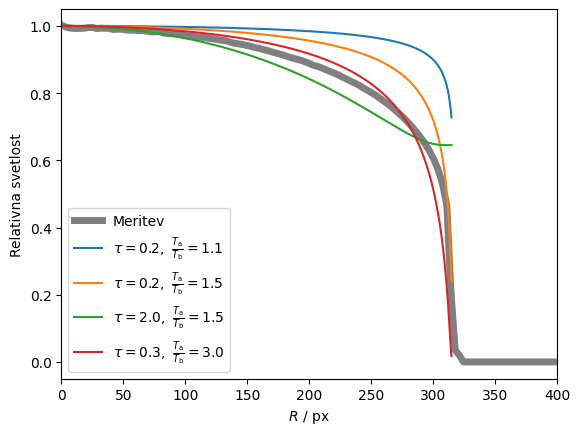

In [18]:
# Narisimo meritve
plt.plot(radij, svetlost, '-', c = 'gray', lw = 5, label = 'Meritev')
plt.xlabel('$R\\ /\\ \\mathrm{px}$')
plt.ylabel('Relativna svetlost')
plt.xlim(0,400);

# Model s tanko absorpcijsko atmosfero in emisijo
r = np.linspace(0,400,1000)
R = 315.0
for tau, t_ratio in [[0.2, 1.1], [0.2, 1.5], [2.0, 1.5], [0.3, 3.0]]:
    i_ratio = t_ratio**4
    I3 = ((i_ratio-1)*np.exp(-tau/np.sqrt(1-(r/R)**2))+1) / ((i_ratio-1)*np.exp(-tau)+1)
    plt.plot(r,I3, label='$\\tau=%s,\\ \\frac{T_\\mathrm{a}}{T_\\mathrm{b}}=%s$' % (tau, t_ratio))

plt.legend();

Če se poigramo z obema prostima parametroma, ugotovimo, da ne moremo najti take kombinacije $\tau$ in $T_\mathrm{p}/T_\mathrm{a}$, da bi model dobro opisal našo meritev. Zaključimo, da tudi ta model ni ustrezen. Opomba: slika Sončeve ploskvice je narejena v rdeči svetlobi, kar pomeni, da razmerje svetilnosti in razmerje temperatur nista povezana s četrto potenco. To ne vpliva na to, da ne najdemo kombinacije parametrov, ki bi opisali meritve. Pomeni le, da razmerje temperatur, ki ga izračunamo iz razmerja svetilnosti, ni točno tako, kot smo izpeljali zgoraj.  

### 4. model: Atmosfera s temperaturnim profilom

Smiselno bi bilo predpostavit, da se svetloba izsevana iz atmosfere v višjih plasteh atmosfere tudi absorbira. V zadnjem modelu predpostavimo, da imamo debelo atmosfero, skozi katero se temperatura zvezno spreminja. Globino v atmosferi parametriziramo z optično globino $\tau$, ki ima vrednost 0 na površju atmosfere (na najbolj zunanjem delu atmosfere, ne zamenjajmo tega s površjem zvezde v prejšnjem modelu) in narašča proti poljubno visokim vrednostim, ko se premikamo globje v atmosfero. V tem modelu nikoli ne dosežemo površja zvezde. Ta je sestavljena le iz atmosfere. Očitno bo večino svetlobe, ki jo zaznamo, prispeval zgornji del atmosfere pri $\tau<1$, zato nas ne skrbi kako dobro tak model opiše notranjost zvezde.

Neka tanka plast atmosfere na globini med $\tau$ in $\tau+\mathrm{d}\tau$ prispeva svetilnost $S(\tau)\frac{1}{\cos \theta} \mathrm{d}\tau$, kot je ilustrirano na spodnji sliki. Debelina tanke plasti merjena v smeri opazovalca je namreč $\mathrm{d}\tau/\cos \theta$.

<figure>
<img src="sonce_model4.png" width="310"/>
</figure>

Svetilnost, ki jo izmerimo na tem delu ploskvice, je manjša za delež svetlobe, ki se absorbira na poti iz globine $\tau$ do površja atmosfere $S(\tau)\frac{1}{\cos \theta} \mathrm{d}\tau \exp(-\tau/\cos \theta)$.

Svetilnost površine Sonca, ki jo izmerimo pri kotu $\theta$, je prispevek svetilnosti vseh tankih plasti na vseh globinah:
$$I(\theta)=\int_0^\infty \frac{1}{\cos \theta} S(\tau) \exp(-\tau/\cos \theta) \mathrm{d}\tau.$$

Prost parameter v tem modelu je izvor svetilnosti $S(\tau)$, ki je v splošnem neka funkcija. Če želimo model narisat, moramo torej rešit integralsko enačbo. Na srečo ima ta integralska enačba znano rešitev. Če uvedemo novo spremenljivko $s=1/\cos \theta$, dobimo enačbo, ki ji rečemo Laplaceova transformacija. Robna zatemnitev je torej Laplaceova transformacija funkcije izvora svetilnosti. Oziroma funkcija izvora svetilnosti je inverzna Laplaceova transformacija robne zatemnitve kot funkcije $1/\cos \theta$. Enačbo rešimo tako, da predpostavimo, da je izvor svetilnosti podan z geometrijsko vrsto
$$S(\tau)=I(\theta=0)\left( a_0 + a_1\tau + a_2\tau^2 + \ldots \right).$$
Svetilnost, ki jo izmerimo pri kotu $\theta$ lahko potem zapišemo kot
$$I(\theta)=I(\theta=0)\left( 0!\, a_0 + 1!\, a_1\cos\theta + 2!\, a_2 \cos^2\theta + \ldots \right),$$
kar dobimo preko Laplaceove transformacije
$$I(s)=\int_0^\infty S(\tau) \exp(-\tau s) s \mathrm{d}\tau.$$
Vstavimo neskončno geometrijsko vrsto za $S(\tau)$:
$$I(s)=\sum_{n=0}^\infty a_n \int_0^\infty \tau^n \exp(-\tau s) s \mathrm{d}\tau.$$
Integral ima rešitev
$$\int_0^\infty \tau^n \exp(-\tau s) s \mathrm{d}\tau=n!\,\frac{1}{s^n}.$$

Narišimo par rešitev. Vrsto smo v spodnji kodi zapisali do tretjega člena, tako da imamo tri proste parametre s katerimi se lahko igramo.


/tmp/ipykernel_1960350/1665548036.py:11: RuntimeWarning: invalid value encountered in sqrt
  I4 = a0 + a1*np.sqrt(1-(r/R)**2) + 2*a2*(1-(r/R)**2)


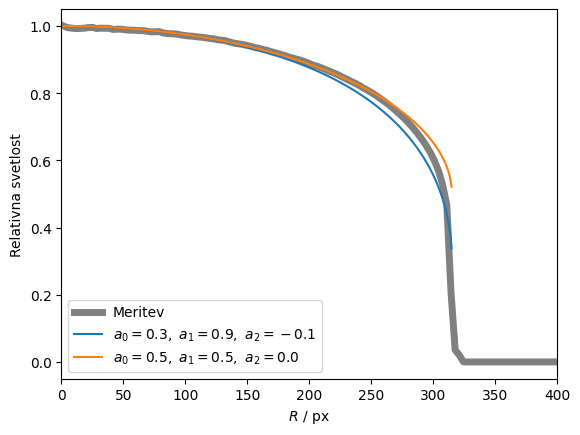

In [19]:
# Narisimo meritve
plt.plot(radij, svetlost, '-', c = 'gray', lw = 5, label = 'Meritev')
plt.xlabel('$R\\ /\\ \\mathrm{px}$')
plt.ylabel('Relativna svetlost')
plt.xlim(0, 400);

# Model atmosfere s temperaturnim prosilom
r = np.linspace(0,400,1000)
R = 315.0
for a0, a1, a2 in [[0.3, 0.9, -0.1], [0.5, 0.5, 0.0]]:
    I4 = a0 + a1*np.sqrt(1-(r/R)**2) + 2*a2*(1-(r/R)**2)
    plt.plot(r,I4, label = '$a_0=%s,\\ a_1=%s, \\ a_2=%s$' % (a0, a1, a2))

plt.legend();

### Prilagajanje modela na meritve

Uporabimo izpeljani model in najdimo njegove parametre s prilagajanjem (fitanjem) modela na meritve. Vidimo, da je ujemanje modela in meritev popolno, z izjemo skrajnega roba Sončeve ploskvice, kjer odpovejo naše geometrijske predpostavke.

Da najdemo najbolje prilegajoč se model, uporabimo metodo minimizacije $\chi^2$ in modula <tt>scipy,optimize</tt>. Ta metoda terja neke začetne parametre modela (koeficiente $a_0$, $a_1$, $a_2$), ki jih poljubno izberemo. Metoda nato izračuna model in ga primerja z meritvami. Razlika med modelom in meritvami pove kako dobro se model pri teh parametrih ujema z meritvami. metoda nato spreminja en parameter naenkrat, ponovno izračuna model in preveri ali se je ujemanje z opazovanji izboljšalo. Če se je, spremeni parameter še bolj. To ponavlja za vse parametre dokler ne najde najboljšega ujemanja.

Če funkciji za prilagajanje modela podamo nedoločenosti naših meritev, lahko izračuna še nedoločenost končnih parametrov modela.

R =  310.4 z negotovostjo  2.8
a0 = 0.435 z negotovostjo  0.043
a1 = 0.703 z negotovostjo  0.099
a2 = -0.071 z negotovostjo 0.029


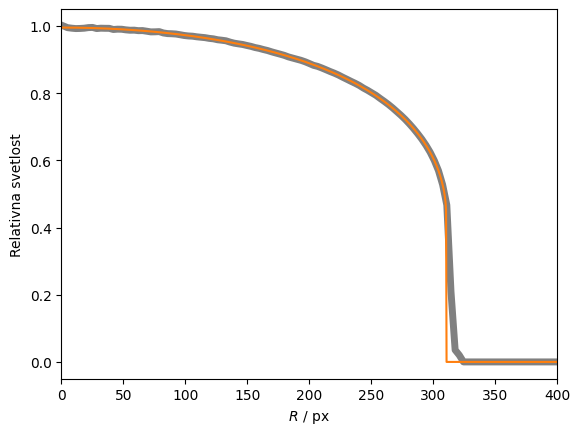

In [20]:
from scipy.optimize import curve_fit

def func_zatemnitev(r, R, a0, a1, a2):
    #funkcija svetlosti povrsine Sonca
    # r: radij
    # R: radij diska
    # a0 - a2 koeficienti

    inside = a0 + a1*np.sqrt(1-(r/R)**2, where=r<R) + 2.*a2*(1-(r/R)**2)

    return np.where(r >= R, 0.0, inside)

# zacetni pogoji za fitanje
R_init = 250
a0_init = 0.6
a1_init = 0.2
a2_init = 0.1

# zacetni pogoji kot vektor
init = [R_init, a0_init, a1_init, a2_init]

# funkcija izracuna najbolje prilegajoce se parametre in jih vrne skupaj s kovariancno matriko
popt, pcov = curve_fit(func_zatemnitev, radij, svetlost, sigma=nedolocenost, absolute_sigma=True, p0=init)

# potegnimo fitane parametre iz vektorske oblike
R_fit, a0_fit, a1_fit, a2_fit = popt

# izpisimo rezultate
print('R =  %.1f z negotovostjo  %.1f' % (R_fit, np.sqrt(pcov[0,0])))
print('a0 = %.3f z negotovostjo  %.3f' % (a0_fit, np.sqrt(pcov[1,1])))
print('a1 = %.3f z negotovostjo  %.3f' % (a1_fit, np.sqrt(pcov[2,2])))
print('a2 = %.3f z negotovostjo %.3f' % (a2_fit, np.sqrt(pcov[3,3])))

# narisimo meritve in fit
#plt.plot(radij, svetlost)
plt.plot(radij, svetlost, '-', c = 'gray', lw = 5, label = 'Meritev')

rr = np.linspace(0,400,1000)
plt.plot(rr, func_zatemnitev(rr, R_fit, a0_fit, a1_fit, a2_fit), c = 'C1')

plt.xlabel('$R\\ /\\ \\mathrm{px}$')
plt.ylabel('Relativna svetlost')
plt.xlim(0,400);

### Temperaturni profil Sončeve atmosfere

Izpeljimo še funkcijo izvora svetilnosti. Če uporabimo isti argument kot v modelu 3, lahko zapišemo temperaturni profil kot funkcijo globine v atmosferi $\tau$:
$T(\tau)\propto S(\tau)^{1/4}$.

Seveda lahko zapišemo zgolj sorazmernost, saj iz robne zatemnitve ne moremo izmeriti temperature Sonca. Za potrebe spodnjega grafa bomo privzeli, da je temperatura Sonca na optični globini $\tau=1$ enaka $6400\ \mathrm{K}$.

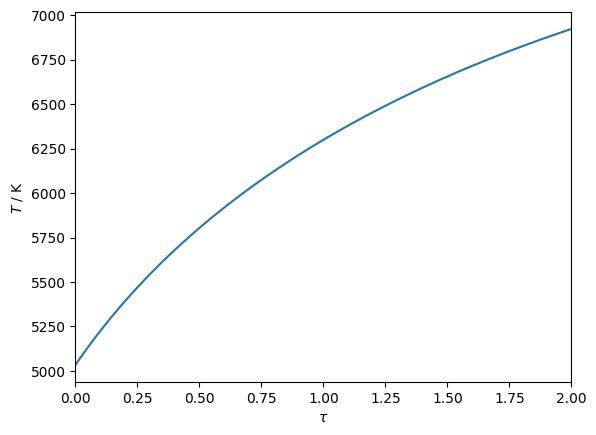

In [21]:
# narisimo graf za opticne globine od 0 do 2
tau = np.linspace(0,2,1000)

# definicija svetilnosti izvora in temperature
S = a0_fit + a1_fit*tau + a2_fit*tau**2
T = S**0.25

# najdimo temperaturo pri tau=1 in skalirajmo T
T_1 = (a0_fit + a1_fit + a2_fit)**0.25

T = T * 6300. / T_1

plt.plot(tau, T)
plt.xlabel('$\\tau$')
plt.ylabel('$T$ / K')
plt.xlim(0,2);

### Komentar

Robno zatemnitev pogosto opišemo z empiričnim modelom
$$\frac{I(r)}{I(0)}=1-u \left( 1- \sqrt{\frac{R^2- r^2}{R^2}} \right),$$
kjer $u$ imenujemo koeficient robne zatemnitve. Formula je identična tisti, ki smo jo izpeljali s četrtim modelom, če nastavimo
$$a_0=1-u$$
$$ a_1= u$$
$$ a_2= 0.$$

Empirična formula ni izpeljana iz četrtega modela. Je le preprosta funkcija, ki zadovoljivo opiše izmerjeno obliko robne zatemnitve. Z modelom 4 smo jo v resnici nehote razširili z dodatnimi prostimi parametri in ji dodali fizikalno interpretacijo: empirični koeficient robne zatemnitve $u$ lahko pojasnimo s temperaturnim profilom Sončeve atmosfere. 

Iste modele (fizikalne in empirične) lahko uporabimo za opis atmosfere drugih zvezd. Spreminjanje svetlosti po ploskvici lahko neposredno posnamemo le za nekaj največjih orjakinj (R Dor, Betelgeza, Mira, Antares in $\pi$ Gru) pa še to s slabo resolucijo. Lahko pa robno zatemnitev natančno izmerimo za zvezde, ki jih okultirajo planeti. Ko planet zakriva različne dele zvezdine ploskvice, vidimo da zvezda potemni sorazmerno s svetlostjo ploskvice na tistem mestu. To bomo videli tudi v vaji Eksoplanet.

## Vprašanja

 * Kako dobro prileganje lahko najdeš za modela 2 in 3?
 * Koliko je različen koeficient robne zatemnitve pri različnih valovnih dolžinah (barvah)?
 * Če je fotosfera Sonca debela 100 km, do kam dobro drži aproksimacija $\tau(\theta)=\tau(\theta=0)/\cos \theta$?
 * Ali prilagajanje modela 4 izboljša uporaba večjega števila členov geometrijske vrste?